Lecture: [The spelled-out intro to language modeling: building makemore](https://www.youtube.com/watch?v=PaCmpygFfXo) (2022 Sep 08)

In [2]:
words = open('data/exoplanet.eu_names.txt', 'r').read().splitlines()

# Some data about the data: 
print(f"Number of inputs: {len(words)}")
shortest = min(words, key = len)
print(f"Shortest, with {len(shortest)} characters: {shortest} ")
longest = max(words, key = len)
print(f"Longest, with {len(longest)} characters: {longest}")

# BTW. The 10th item is the data set is 1I othewise known as [1I/ʻOumuamua](https://en.wikipedia.org/wiki/%CA%BBOumuamua) 
# which is the 1st interstellar object detected passing through the Solar System! 
# That's why it's called 1I - one interstellar. 
#
# For added excitment check out the book by a Harvard University astronomer Avi Loeb 
# entitled [Extraterrestrial: The First Sign of Intelligent Life Beyond Earth](https://en.wikipedia.org/wiki/Extraterrestrial:_The_First_Sign_of_Intelligent_Life_Beyond_Earth).


# First ten elements 
print(words[:10])

chars = sorted(list(set(''.join(words))))

print(f"Chars (len: {len(chars)}): ")
print(','.join(chars))

Number of inputs: 5197
Shortest, with 2 characters: 1i 
Longest, with 31 characters: gaia edr3 2077240046296834304 b
['11 com b', '11 oph b', '11 umi b', '14 and b', '14 her b', '14 her c', '16 cyg b b', '17 sco b', '18 del b', '1i']
Chars (len: 43): 
 ,(,),+,-,0,1,2,3,4,5,6,7,8,9,[,],a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z


In [3]:
# Add the start/end element
chars.insert(0, '.')

In [4]:
n_input1 = len(chars)

stoi1 = {}
for i,s in enumerate(chars):
    stoi1[s] = i
itos1 = {i: s for s, i in stoi1.items()}


pairs = []
for ch1 in chars:
    for ch2 in chars:
        pairs.append(ch1+ch2)

n_input2 = len(pairs)

stoi2 = {}
for i,s in enumerate(pairs):
    stoi2[s] = i
itos2 = {i: s for s, i in stoi2.items()}

print(n_input2)

1936
43
44


In [5]:
from collections import namedtuple

TModel = namedtuple('TModel', 'data name extra')

In [6]:
import torch

In [7]:
# by default dtype is torch.float32 
from pyexpat import model


m = torch.zeros(n_input2,n_input1, dtype=torch.int32)  

for w in words: 
    w = '.' + w + '.' 
    for i in range(2, len(w)):
        next_chr = w[i]
        col = stoi1[next_chr]
       
        pair = w[i-2]+w[i-1]
        row = stoi2[pair]
       
        m[row, col] += 1

# Smoothing 
model_tri_statistical_smoothened = m.detach().clone()
model_tri_statistical_smoothened += 1

model_tri_statistical = TModel(m, 'Statistical model', None)

model_tri_statistical_smoothened = TModel(model_tri_statistical_smoothened, 'Statistical model, smooth', None)



print(model_tri_statistical_smoothened.data.shape)
print(model_tri_statistical.data.shape)

torch.Size([1936, 44])
torch.Size([1936, 44])


In [64]:
import matplotlib.pyplot as plt
%matplotlib inline

def getFig(model, big=False):
    if big: 
        figsize=(100,100)
    else: 
        figsize=None
    fig = plt.figure(figsize=figsize)
    draw(fig, model)

    return fig

def draw(fig, model):
    ax = fig.add_subplot()
    drawAx(ax, model)

def drawAx(ax, model):    
    ax.imshow(model.data) 
    ax.axis('off')
    title = model.name
    if model.extra:
        title += "\n"+model.extra
    ax.set_title(title)

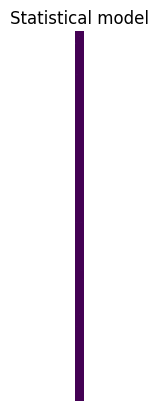

In [65]:
getFig(model_tri_statistical);

In [15]:
# Let's get a model with uniform distribution (aka any bigram is as likely)

model_tri_uniform = torch.ones((n_input2,n_input1)) # If all counts are 1 then all 'next-letter' are equally likely

model_tri_uniform = TModel(model_tri_uniform, 'Uniform model', None)

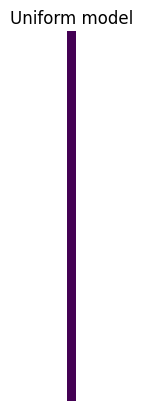

In [31]:
getFig(model_tri_uniform);

In [17]:
from torch import tensor


def showSamples(model, n):
    g = torch.Generator().manual_seed(7)

    beginnings = []
    for i in range(n_input1):
        beginnings.append(model[i].sum())
    #print(beginnings)
    beginnings = torch.tensor(beginnings)
    
    for i_sample in range(n):
        # Step 1: choose what to start with
        iy = beginnings.multinomial(num_samples=1, replacement= True, generator= g).item()
        name = [itos2[iy]];
        itry = 0
        while itry < 1000:
            itry +=1
            Ni = model[iy]
            ix = Ni.multinomial(num_samples=1, replacement= True, generator= g).item()
            if ix == 0:
                break;
            next = itos1[ix];
            name.append(next)
            pair = ''.join(name)[-2:]
            #print(f"got {ix}({itos1[ix]})  => new name={''.join(name)}, pair={pair}")
            iy = stoi2[pair]

        print(''.join(name))

In [18]:
# Let's get 20 names
showSamples(model = model_tri_uniform.data, n = 20)

.66tkws6gpp((1 -t
.x+zwul7voxs0yf)kn9(2(o9av9d31r9gr
.[3wmwxstorirfjf5cf89e637y8ga5xnpz
.t[q14[75[][pw9-s6lxe6ufjmelunlsbwy7w82
.)yt0)l8d
.g5z5jtbr8phelsh70djsiij cprl0m3wyd0x3o(08]+u5e l7g+5 wcexunervmd[cs
.6]y)y
.6awljjp1nqgm))jn33oybmz8lf956j-vicoe cfv771n5]g43b344ozoag607kvvwz7zo88u(2xtaikxgi3i0 6[y+xup7yg[shz5o 8
.sln5d19n))92x-)045rpx ]h
.h[34ra -tn7mjtvmmogt+9-[7i9
.htfm)bm5n0
.08igp)[p9upm9q
.-
.tqwxv[0t26gdrn[gdc7e3yytvw9oz8txln
.bn4a37661l7ov
..bz)6o75m7ts+yqd]q9u8h-npa)fx5u[jfs2n7[r7ru9odd19knt6n7sf5f-[khc9f9znbn5zofudgafxc)[ sgcoxa6aydvbrnzr1+2i6jiyq+1cokp(bsyw
.m5(rlp67x 38s68x8mqkq rfxdavs- (en0t]g1fjx0jf9fovez [thzno)4y)sbs8ogwqm1r-)q+(2p2frd2gi2aa qq(lq5y4afsaf 6h6aq4p(am83m
.m65]5)kw
.q-fw0qym4ds+sxi1g]a4 v-gif[6[yoerezb6s5b9avf3kp x0bv8w7cist+46oi6smuchiv6t n [gpz463gw-c]21b-txzu(-nchi8wu-x(i7ked3j-v(uigitgb08ov44sq278vi3wk]3d
.kxty37k9qb38xc5s4


In [19]:
showSamples(model = model_tri_statistical.data.float(), n = 20)

.kepler-376 b
.chxr (bc)
.kepler-2018-51 b
.kepler-147 b
.toi-685516322 b
.kepler-142 d
.koi-26 b
.kepler-108 b
.kepler-48425289 d
.hats-106 b
.kepler-62541383 b
.keple-2665 b
.tyc e
.k2-13 c
.k2-14 b
.toi-76 c
.keple-219 d
.kepler-15704 b
.kepler-9233 b
.k2-2253 b


In [20]:
# Let's get 20 names
showSamples(model = model_tri_statistical_smoothened.data.float(), n = 20)

.hd 3ns7gpq((1 b
.(x+zwul8voxs(yf)kn9(2(o9av9d31904[
.kepler-77diralf-cf992 b
.wasp-jnpz
.pin-21013308m9-k6lwe7ufjkepler-29r7w82
.5yt0)l8d
.kepler-62953794 b
.keple-2697 b
.tyc u6o(081 d
.k2-14 b
.toifumcrvkd[cs
.hdf)y
.hd 3769 b
.kepler-16qbmz8lb95 b
.toi-3 b
.toi-62011-blg-2nn[g60+jvvwz7zo88l b
.qaokxgi3i0 b
.wassg7yg[shz5o 9 c
.kepler-120b-)04 c
.v 87 b


In [21]:
def GetNLL(model_normalised):
    log_likelihood = 0
    n = 0
    for w in words: 
        w = '.' + w + '.' 
        for i in range(2, len(w)):
            next_chr = w[i]
            col = stoi1[next_chr]
            pair = w[i-2]+w[i-1]
            row = stoi2[pair]

            prob = model_normalised.data[row, col]
            logprob = torch.log(prob)
            log_likelihood += logprob
            n += 1
            
    nll = -log_likelihood
    nll /= n
    return nll

# w = '.' + w + '.' 
# for i in range(2, len(w)):
#     next_chr = w[i]
#     col = stoi1[next_chr]
    
#     pair = w[i-2]+w[i-1]
#     row = stoi2[pair]
    
#     m[row, col] += 1    

In [24]:
model_tri_uniform_normalised = model_tri_uniform.data.float()
model_tri_uniform_normalised/= model_tri_uniform_normalised.sum(1, keepdim=True) 

model_tri_uniform_normalised = TModel(model_tri_uniform_normalised, "Uniform normalised", None)

GetNLL(model_tri_uniform_normalised)

tensor(3.7823)

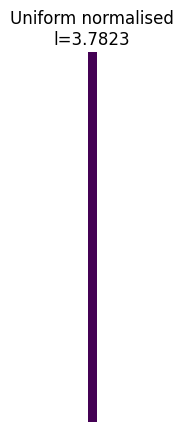

In [28]:
# Let's update the plot with the loss: 
model_tri_uniform_normalised = TModel(model_tri_uniform_normalised.data, model_tri_uniform_normalised.name, extra = f'l={GetNLL(model_tri_uniform_normalised):.4f}')
getFig(model_tri_uniform_normalised);

In [29]:
model_tri_statistical_normalised = model_tri_statistical.data.float()
model_tri_statistical_normalised/= model_tri_statistical_normalised.sum(1, keepdim=True) 

model_tri_statistical_normalised = TModel(model_tri_statistical_normalised, "Statistical normalised", None)

GetNLL(model_tri_statistical_normalised)


tensor(1.0906)

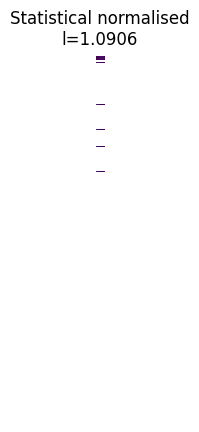

In [68]:
# Let's update the plot with the loss: 
model_tri_statistical_normalised = TModel(model_tri_statistical_normalised.data, model_tri_statistical_normalised.name, extra = f'l={GetNLL(model_tri_statistical_normalised):.4f}')
pltStatistical = getFig(model_tri_statistical_normalised, big=False)

#getFig(model_tri_statistical_normalised, big=True)


# Building the neural network model

In [40]:
# Create the dataset

#Creating the training set from all bigrams
xs, ys = [], []

for w in words:  # Using all the words
    w = '.' + w + '.'
    for i in range(2, len(w)):
        next_chr = w[i]
        col = stoi1[next_chr]
        ys.append(col)
        pair = w[i-2]+w[i-1]
        row = stoi2[pair]
        xs.append(row)
    
xs = torch.tensor(xs)
ys = torch.tensor(ys)
n = xs.nelement()
print(f"Number of inputs: {n}")


Number of inputs: 59906


In [97]:
# Create the neural net

g = torch.Generator().manual_seed(44)
W = torch.randn((n_input2,n_input1), generator=g, requires_grad=True)
epoch = 0

print(W.shape)

torch.Size([1936, 44])


In [98]:
import torch.nn.functional as F
def GetModel(ws):
    counts = W.exp()
    return counts

def GetModelNormalised(ws):
    counts = W.exp()
    probs = counts / counts.sum(1, keepdim=True)
    return probs

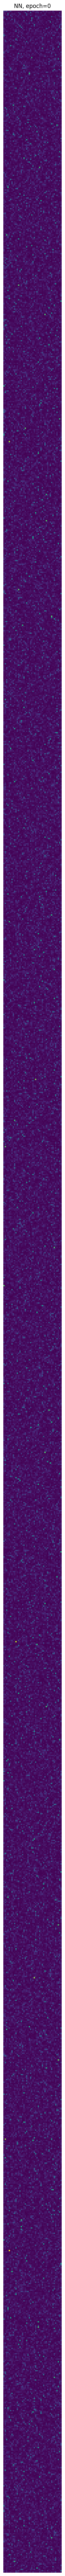

In [99]:
assert epoch < 1, "Oh. Oh. It looks like the network is already trained"

model_tri_nn_normalised_no_training = TModel(GetModelNormalised(W).detach(), name=f'NN, epoch=0', extra=None)

getFig(model_tri_nn_normalised_no_training, big=True);

In [100]:
# Let's get 20 names
showSamples(model = model_tri_nn_normalised_no_training.data, n = 20)

.67sluq2ltp))) )k
.x-zwth]ulwq)yh-qi7+3+q[dr]j2+safp
.[6xiyxqvqjbocpb79d98f]46y]ha4wolz q6n-a7]4]g5pv5)t(oy]9u8lnkhrplrhry9x4a
.)yw1)k]f
.g9z[hobv8ohhhph98enqpoh)]lok1m5wzd0y+k)3]a+v3[(n[h-5+ufexvlipsg96]w
.68w0x
.69ykicz3sqfi1)hl-[kyboz7rjd97j(ul]nf adt6]6r44g84]752pxoad6)[ntsuz5zv[[x)-zteikwef4i1 9ax0ytn3x5cueyam 2 rgm8e4as--64w23-58wtw
.]j k928rb) qpatnwxpqjbt 6095m7 htdo)go8k0
.02cio-7n3rll7r 0
.trywug1x1)edqj[ci[9e4xyrvw1my7uwoi
.bm6a5798+i8qr
..ay(8o30r8ss(xli9t[s9c0oo8)hv5x4kao2p[brbnu9nae4anpnbp7ubal)9hob]efzkcn4xobvhn]fxf(5 ve]rwcb8wiwgqtzp1)0k9jdzq32djhn([tvu(h42pop76w ][q[9x4krkr
.rdxf8vt0) 8f1s8j1dhw3ihabtsey 8qezqt+9y+m]q[nlvmp0v
.)m1-2s0dwe4kh-de
.qp+nj8z7iko8b 7g5ap5q)aj]4s
.m64d(+iu
.q+ex1mxib]o-rwj1ed[0(q(lee892yufqhz94r-59awe4lk+t2hu5v9eisv-3and7rrvcdgt2u(h 9esy7b1gz0b5+7]+uyzs)1o]]c4xv0w)i6mhf1l0x)xngekge0[qs3-oq396si4tj3-i iypz-9n5le49wa1o5
.f]-533kkwhgqy0txlt3bu1ovij2u5g2uj6-77h0(2)yw)5ue14 da5x[r1arg6t5q9 6qvj-h]c5+300tjy1v80v[ub1o[x]vlunf0g-yw3)f[ha6x
.e uan)gio+

In [101]:
print(f"NLL for uniform model: {GetNLL(model_tri_uniform_normalised):.4f}")
print(f"NLL for statistical model: {GetNLL(model_tri_statistical_normalised):.4f}")
print(f"NLL for untrained NN model: {GetNLL(model_tri_nn_normalised_no_training):.4f}")

# Bigram models:
# NLL for uniform model: 3.7822
# NLL for statistical model: 1.5626
# NLL for untrained NN model: 4.3652
# 
# Observation: untrained model is worse than a uniform model, and that's OK


# Trigram models: 
# NLL for uniform model: 3.7823
# NLL for statistical model: 1.0906
# NLL for untrained NN model: 4.4947
# Observations:
# 1. The statistical trigram model has really small loss
# 2. An untrained trigram model is even worse than the untrained bigram model
# 3. The uniform models (bi and trigram) have a very similar loss

NLL for uniform model: 3.7823
NLL for statistical model: 1.0906
NLL for untrained NN model: 4.4947


In [102]:
def getL0ss():
    xenc = F.one_hot(xs, num_classes=len(stoi2)).float()
    logits = xenc @ W
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdim=True)
    loss = -probs[torch.arange(n), ys].log().mean()
    return loss

In [103]:
#Confirm that the vectorise and non vectorised versions give the same loss
assert epoch < 1, "Oh. Oh. It looks like the network is already trained"

loss_for_nn_untrained = getL0ss()
print(f"NLL for untrained NN model, unvectorised: {GetNLL(model_tri_nn_normalised_no_training):.4f}")
print(f"Loss for untrained NN model, vectorised: {loss_for_nn_untrained:.4f}")


NLL for untrained NN model, unvectorised: 4.4947
Loss for untrained NN model, vectorised: 4.4947


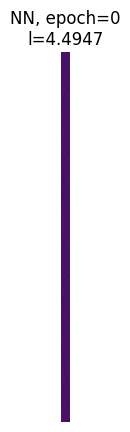

In [104]:
# Let's capture the loss at epoch 0

assert epoch < 1, "Oh. Oh. It looks like the network is already trained"

model_tri_nn_normalised_no_training = TModel(GetModelNormalised(W).detach(), name=f'NN, epoch=0', extra=f'l={getL0ss():.4f}')
getFig(model_tri_nn_normalised_no_training);


In [105]:
# Train NN 

# Gradient descent

steps = 300
for k in range(steps):
    
    # Forward pass
    loss = getL0ss()
    print(f"\r Epoch: {epoch-1}, loss: {loss}", end= "")
    
    # Backward pass
    W.grad = None
    loss.backward()

    # Update
    W.data += -50 * W.grad
    epoch +=1

# Print the situation after the last update
loss = getL0ss()
print(f"\r Epoch: {epoch}, loss: {loss}", end="")

 Epoch: 300, loss: 1.2978731393814087

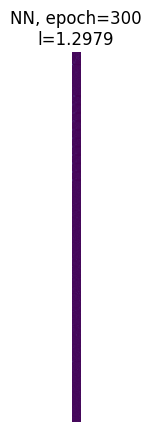

In [106]:
model_tri_nn_normalised = TModel(GetModelNormalised(W).detach(), name= f'NN, epoch={epoch}', extra = f'l={loss:.4f}')

getFig(model_tri_nn_normalised);

In [107]:
showSamples(model = model_tri_nn_normalised.data, n = 20)

.67isvtasp-10-(1s
.x-zwti3ulwq)yh-qi7+2(m9fs]g30c]en
.[6xiyxqvqjbodkj4g89 b
.34w6j[6xkpz
.toi-122+[5[pw71l b
.epler-25imjqaxy7x8+ )xv1-blg-11x5kq[u5ockic 20189245 b
.rg3m3vyc)y8o(07 b
.5e(k9i10 d
.epler-88 b
.s d
.y+x(8]wmgeg3mvdm-+qn669yikz5f[73 b
.vj9na)9bt96 b
.]h9]d85 b
.ogler-39lvx3zm-5c+1yt6lfxkk2-1014r+xsm6ziavfx9l
.8
.sqq9c186 b
.2m0+07 c
.x
.]j 67 b
.a


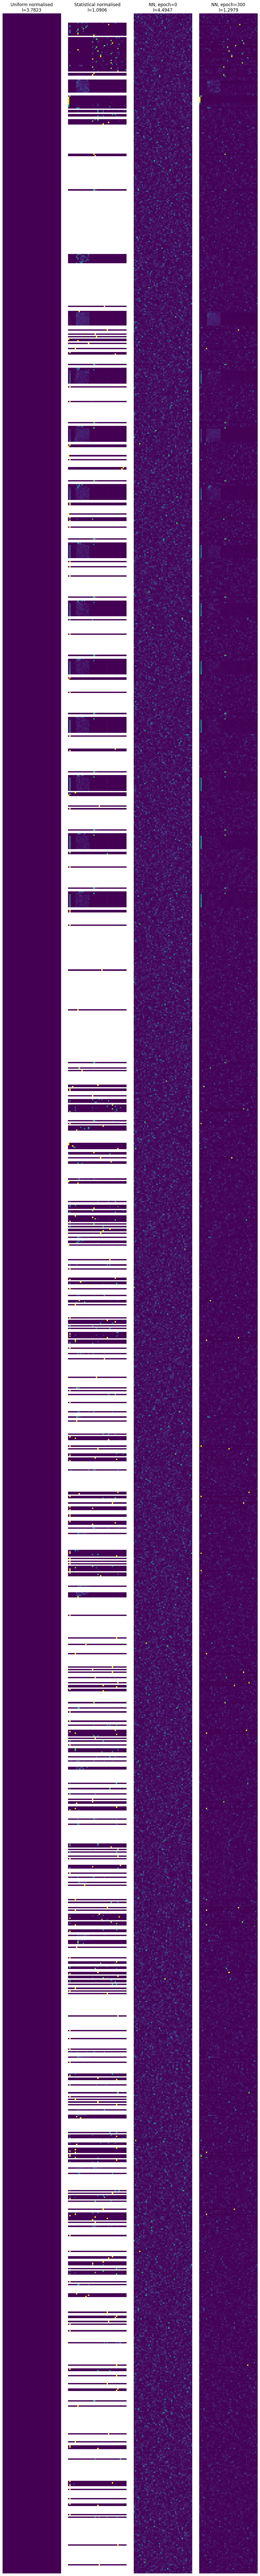

In [108]:
fig = plt.figure(constrained_layout=True, figsize=(10, 100))
subfigs = fig.subfigures(nrows=1, ncols=4, wspace=0.07)

draw(subfigs[0],model= model_tri_uniform_normalised)
draw(subfigs[1],model= model_tri_statistical_normalised)
draw(subfigs[2],model= model_tri_nn_normalised_no_training)
draw(subfigs[3],model= model_tri_nn_normalised)

# Observations
#
# 1. The statistical trigram model has really small loss
# 2. An untrained trigram model is even worse than the untrained bigram model
# 3. The uniform models (bi and trigram) have a very similar loss
# 4. The trigram model's step takes much longer
# 5. The statistical model generates names that are very similar to the names in the input file, with some predictions actually being in the input file
# 6. The trigram NN model's names are not that great